# Arithmetic and Bitwise Operations

In this kernel we're gonna cover:
1. Arithmetic Operations
2. Bitwise Operations

In [1]:
# Import Libraries
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-08-25 11:42:20--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 3.5.246.154
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|3.5.246.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  21.0MB/s    in 1.3s    

2022-08-25 11:42:22 (21.0 MB/s) - ‘images.zip’ saved [29586716/29586716]



## Arithmetic Operations

These are simple operations that allow us to directly add or subtract to the color intensity.

The overall effect is increasing or decreasing **brightness**.

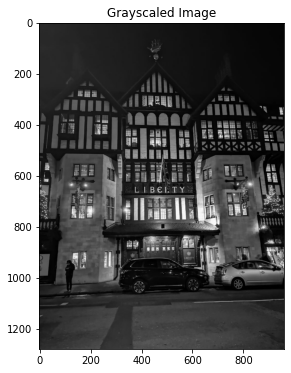

In [3]:
# Load our image and read it in grayscale mode
image = cv2.imread('images/liberty.jpeg', 0) # 0 means load image as a grayscale image

# Show our image 
plt.figure(figsize = (10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Grayscaled Image');

> 🔑**Note:** We could have used openCV library to read image in grayscale mode. But there's another way to do that. While loading our image we can use 0 to read image in grayscale mode.

For more information check this website: https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/

In [4]:
# Create a matrix with same dimension of our image with all values being 100
M = np.ones(image.shape, dtype = 'uint8') * 100

In [5]:
# Check the values of our image
print(image)

[[41 41 41 ...  5  5  5]
 [41 41 41 ...  5  5  5]
 [41 41 41 ...  5  5  5]
 ...
 [41 42 44 ... 34 33 32]
 [43 44 46 ... 31 30 28]
 [44 45 46 ... 32 30 29]]


In [6]:
# Check the values of our matrix 
print(M)

[[100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 ...
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]]


## Increasing Brightness

When adding our matrix to our image we need to use `cv2.add` function. In order to increase brightness. 

We can't use `+` operations here. Because, if we add them by using `+` then the result of its is going to be over 255. Which means, say the value of one pixel is 200 then it's going to be 300. In this case there will be a substraction operation which means the pixel is going to be even darker. (300 - 255).

`cv2.add` eclipse it and keeps the value.

Let's show the difference between them.

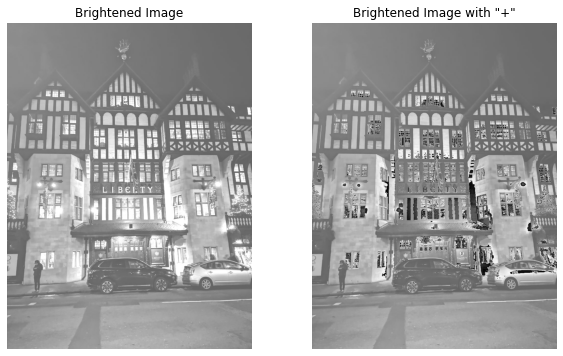

In [7]:
# Increase the brightness of our image
brightened_image = cv2.add(image, M)

# Try to increase the brightness with "+"
brightened_image_w_plus = image + M

# Plot them and see the differences
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(brightened_image, cv2.COLOR_BGR2RGB))
plt.title('Brightened Image')
plt.axis(False)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(brightened_image_w_plus, cv2.COLOR_BGR2RGB))
plt.title('Brightened Image with "+"')
plt.axis(False);

## Decreasing Brightness

Similaryly while doing subtraction we need to use `cv2.subtract`, otherwise we're gonna get even brighter image.

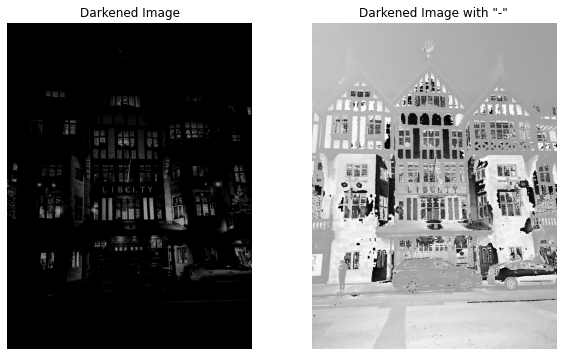

In [8]:
# Decrease the brightness
darkened_image = cv2.subtract(image, M)

# Try to decrase the brightness with "-"
darkened_image_w_minus = image - M

# Plot them and see the differences
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(darkened_image, cv2.COLOR_BGR2RGB))
plt.title('Darkened Image')
plt.axis(False)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(darkened_image_w_minus, cv2.COLOR_BGR2RGB))
plt.title('Darkened Image with "-"')
plt.axis(False);

## Bitwise Operations and Masking


To demonstrate these operations let's create some simple images

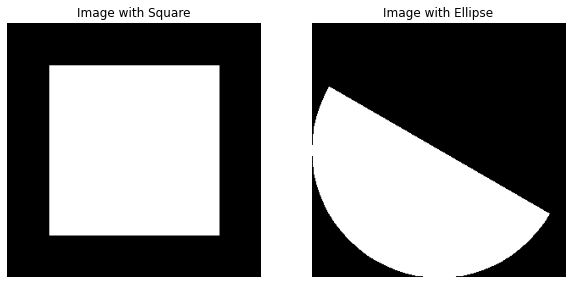

In [9]:
# Making a square
image_w_square = np.zeros((300, 300), np.uint8)
cv2.rectangle(image_w_square, (50, 50), (250, 250), 255, -2)

# Making a ellipse
image_w_ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(image_w_ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)

# Show our images
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_w_square, cv2.COLOR_BGR2RGB))
plt.title('Image with Square')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_w_ellipse, cv2.COLOR_BGR2RGB))
plt.title('Image with Ellipse')
plt.axis('off');

### Experimenting with some bitwise operations such as AND, OR, XOR and NOT

* **AND** - shows only where they intersect
* **OR** - shows where either the first one or second one is
* **XOR** - shows where either exist by itself
* **NOT** - shows everything that isn't part of the given one

It's useful when doing image masking, inverting images and etc.

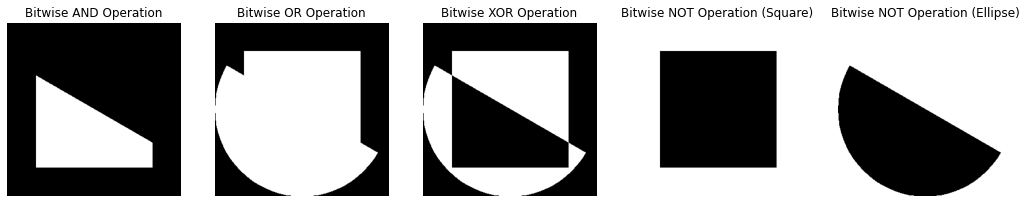

In [10]:
# AND operation
bitwise_and = cv2.bitwise_and(image_w_square, image_w_ellipse)

# OR operation
bitwise_or = cv2.bitwise_or(image_w_square, image_w_ellipse)

# XOR operation
bitwise_xor = cv2.bitwise_xor(image_w_square, image_w_ellipse)

# NOT operation
bitwise_not_sq = cv2.bitwise_not(image_w_square) # for square
bitwise_not_elp = cv2.bitwise_not(image_w_ellipse) # for ellipse

# Demonstrate every operations
# AND operation
plt.figure(figsize = (18, 10))
plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(bitwise_and, cv2.COLOR_BGR2RGB))
plt.title('Bitwise AND Operation')
plt.axis(False)

# OR operation
plt.subplot(1, 5, 2)
plt.imshow(cv2.cvtColor(bitwise_or, cv2.COLOR_BGR2RGB))
plt.title('Bitwise OR Operation')
plt.axis(False)

# XOR operation
plt.subplot(1, 5, 3)
plt.imshow(cv2.cvtColor(bitwise_xor, cv2.COLOR_BGR2RGB))
plt.title('Bitwise XOR Operation')
plt.axis(False)

# NOT operation for Square
plt.subplot(1, 5, 4)
plt.imshow(cv2.cvtColor(bitwise_not_sq, cv2.COLOR_BGR2RGB))
plt.title('Bitwise NOT Operation (Square)')
plt.axis(False);

# NOT operation for Ellipse
plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(bitwise_not_elp, cv2.COLOR_BGR2RGB))
plt.title('Bitwise NOT Operation (Ellipse)')
plt.axis(False);